In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'uni_rankings.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,aliases,subjects_offered,closed,unaccredited
0,10.0,1.0,University of Oxford,98.5,10.0,96.6,5.0,100.0,2.0,99.0,...,United Kingdom,"21,750",10.9,42%,49:51:00,23%,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False
1,20.0,2.0,Stanford University,98.0,20.0,99.0,1.0,97.8,8.0,99.6,...,United States,"14,517",6.4,23%,47:53:00,22%,Stanford University,"Computer Science,Communication & Media Studies...",False,False
2,30.0,3.0,Massachusetts Institute of Technology,97.9,30.0,98.6,2.0,96.2,11.0,99.7,...,United States,"11,085",8.0,33%,41:59:00,40%,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,False
3,40.0,4.0,Harvard University,97.8,40.0,97.7,3.0,99.9,3.0,99.4,...,United States,"20,050",9.0,25%,51:49:00,12%,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False
4,50.0,5.0,University of Cambridge,97.5,50.0,95.8,7.0,100.0,1.0,98.0,...,United Kingdom,"20,565",11.5,38%,48:52:00,27%,University of Cambridge,Politics & International Studies (incl Develop...,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         201 non-null    float64
 1   rank                               201 non-null    float64
 2   name                               201 non-null    object 
 3   scores_overall                     201 non-null    float64
 4   scores_overall_rank                201 non-null    float64
 5   scores_teaching                    201 non-null    float64
 6   scores_teaching_rank               201 non-null    float64
 7   scores_research                    201 non-null    float64
 8   scores_research_rank               201 non-null    float64
 9   scores_citations                   201 non-null    float64
 10  scores_citations_rank              201 non-null    float64
 11  scores_industry_income             201 non-null    float

In [6]:
df.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'location', 'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio',
       'stats_proportion_of_isr', 'aliases', 'subjects_offered', 'closed',
       'unaccredited'],
      dtype='object')

In [7]:
df = df.select_dtypes(exclude=['object'])
df.head()

,rank_order,rank,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,stats_student_staff_ratio
0,10.0,1.0,98.5,10.0,96.6,5.0,100.0,2.0,99.0,5.0,98.7,77.0,97.5,14.0,10.9
1,20.0,2.0,98.0,20.0,99.0,1.0,97.8,8.0,99.6,2.0,100.0,25.0,87.0,168.0,6.4
2,30.0,3.0,97.9,30.0,98.6,2.0,96.2,11.0,99.7,1.0,100.0,16.0,93.8,66.0,8.0
3,40.0,4.0,97.8,40.0,97.7,3.0,99.9,3.0,99.4,3.0,84.2,216.0,90.8,120.0,9.0
4,50.0,5.0,97.5,50.0,95.8,7.0,100.0,1.0,98.0,12.0,87.9,180.0,97.4,15.0,11.5


In [8]:
df.isnull().sum().sum()

37050

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

rank_order                           0
rank                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
scores_industry_income               0
scores_industry_income_rank          0
scores_international_outlook         0
scores_international_outlook_rank    0
stats_student_staff_ratio            0
dtype: int64

In [11]:
df.corr()

,rank_order,rank,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,stats_student_staff_ratio
rank_order,1.000000,0.999919,-0.928899,1.000000,-0.807944,0.715433,-0.890698,0.875382,-0.402703,0.344385,-0.252705,0.268768,-0.264311,0.256968,0.214256
rank,0.999919,1.000000,-0.929267,0.999919,-0.808329,0.715658,-0.890826,0.874965,-0.403199,0.344919,-0.250992,0.266433,-0.265012,0.257647,0.213971
scores_overall,-0.928899,-0.929267,1.000000,-0.928899,0.894009,-0.668187,0.948492,-0.816339,0.430188,-0.361368,0.228257,-0.240048,0.257567,-0.248654,-0.266987
scores_overall_rank,1.000000,0.999919,-0.928899,1.000000,-0.807944,0.715433,-0.890698,0.875382,-0.402703,0.344385,-0.252705,0.268768,-0.264311,0.256968,0.214256
scores_teaching,-0.807944,-0.808329,0.894009,-0.807944,1.000000,-0.826457,0.906762,-0.770724,0.070331,-0.002275,0.228842,-0.240796,-0.053187,0.056616,-0.419916
scores_teaching_rank,0.715433,0.715658,-0.668187,0.715433,-0.826457,1.000000,-0.698901,0.696603,0.061452,-0.104357,-0.231854,0.255442,0.187429,-0.187587,0.400345
scores_research,-0.890698,-0.890826,0.948492,-0.890698,0.906762,-0.698901,1.000000,-0.914912,0.181764,-0.111229,0.294513,-0.305860,0.116407,-0.110291,-0.197188
scores_research_rank,0.875382,0.874965,-0.816339,0.875382,-0.770724,0.696603,-0.914912,1.000000,-0.076569,0.015043,-0.350389,0.363956,-0.070678,0.064450,0.090172
scores_citations,-0.402703,-0.403199,0.430188,-0.402703,0.070331,0.061452,0.181764,-0.076569,1.000000,-0.991910,-0.168390,0.158375,0.426426,-0.417080,-0.019426
scores_citations_rank,0.344385,0.344919,-0.361368,0.344385,-0.002275,-0.104357,-0.111229,0.015043,-0.991910,1.000000,0.181895,-0.173460,-0.403520,0.396827,-0.018726


In [12]:
df.describe()

,rank_order,rank,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,stats_student_staff_ratio
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,1010.000000,100.606965,70.358706,1010.000000,57.778607,135.950249,61.058209,110.507463,87.694030,184.208955,87.400000,199.562189,77.352239,326.243781,17.978607
std,581.678605,57.857582,10.598516,581.678605,16.174804,112.375075,16.919588,72.551094,9.629209,194.658537,12.882112,176.300333,16.500373,287.214128,10.812460
min,10.000000,1.000000,58.700000,10.000000,32.100000,1.000000,35.000000,1.000000,33.900000,1.000000,34.900000,1.000000,32.900000,2.000000,3.900000
25%,510.000000,51.000000,62.000000,510.000000,46.500000,52.000000,47.400000,51.000000,83.700000,56.000000,76.400000,59.000000,65.200000,93.000000,11.100000
50%,1010.000000,101.000000,66.600000,1010.000000,53.500000,108.000000,56.700000,103.000000,89.700000,130.000000,92.000000,145.000000,80.100000,256.000000,14.800000
75%,1510.000000,150.000000,75.600000,1510.000000,66.200000,181.000000,72.800000,162.000000,94.300000,241.000000,99.500000,313.000000,92.500000,482.000000,20.500000
max,2010.000000,199.000000,98.500000,2010.000000,99.000000,588.000000,100.000000,350.000000,99.700000,1354.000000,100.000000,1095.000000,98.700000,1391.000000,58.500000


<Axes: >

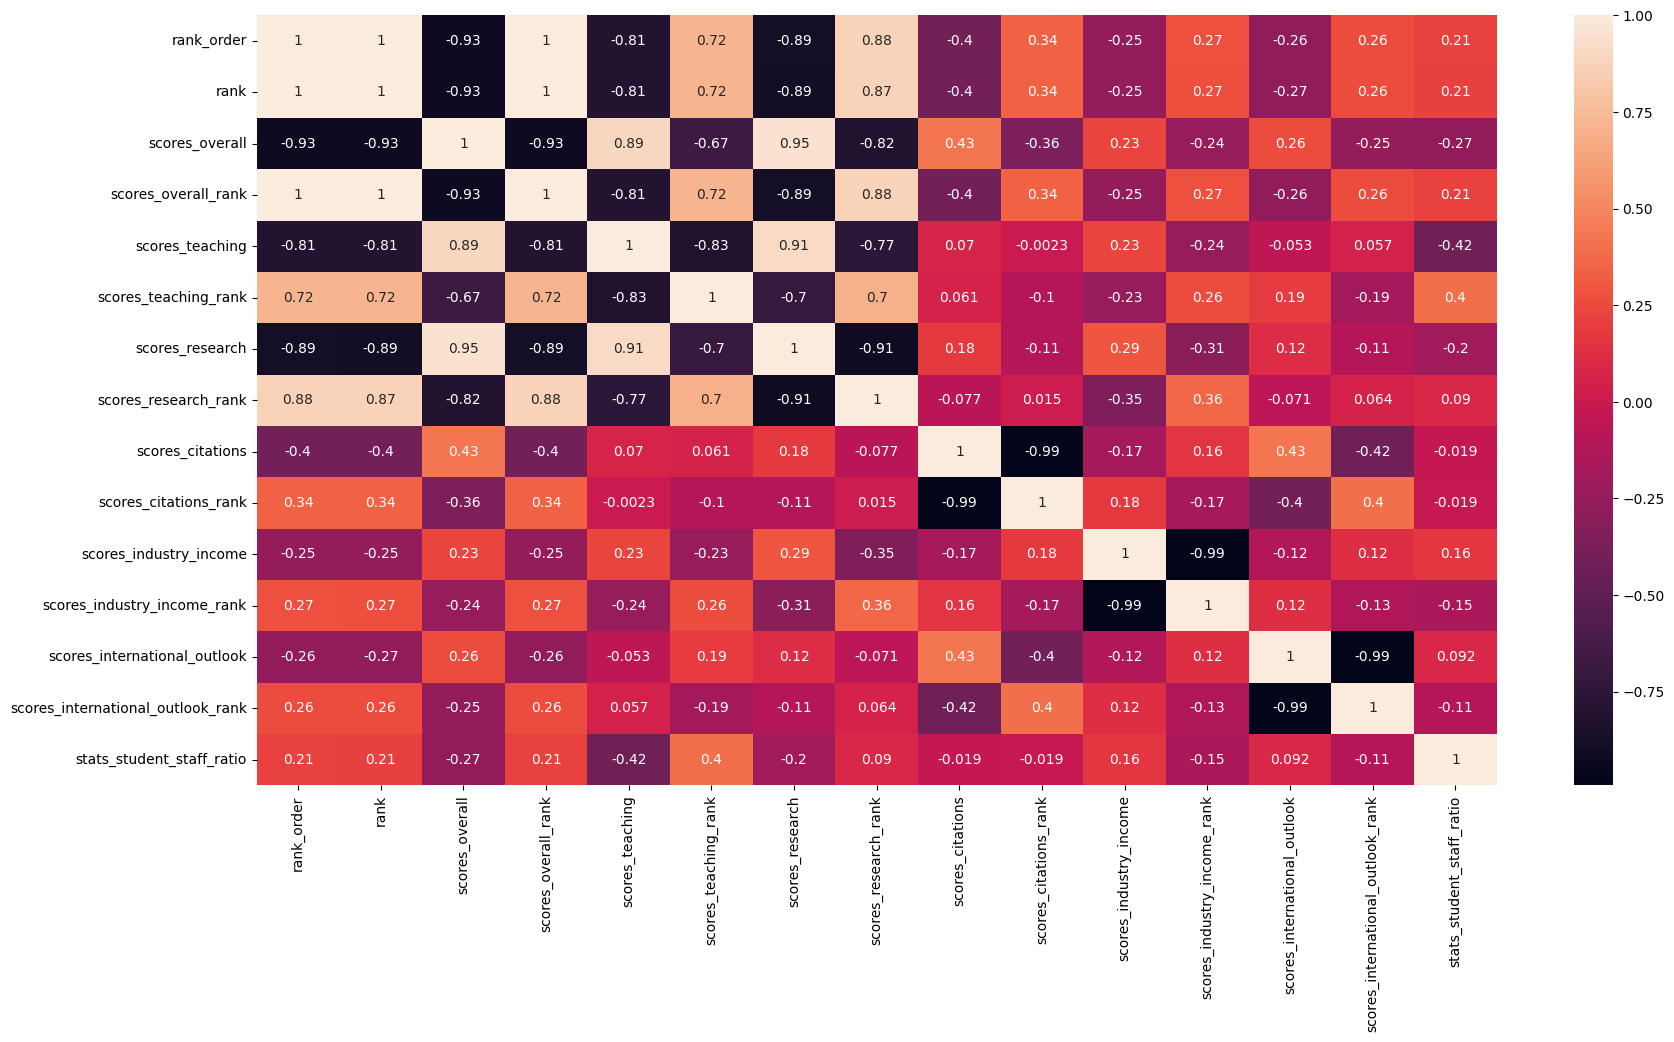

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

In [14]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [15]:
df.head()

,rank_order,rank,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,stats_student_staff_ratio
0,10.0,1.0,98.5,10.0,96.6,5.0,100.0,2.0,99.0,5.0,98.7,77.0,97.5,14.0,10.9
1,20.0,2.0,98.0,20.0,99.0,1.0,97.8,8.0,99.6,2.0,100.0,25.0,87.0,168.0,6.4
2,30.0,3.0,97.9,30.0,98.6,2.0,96.2,11.0,99.7,1.0,100.0,16.0,93.8,66.0,8.0
3,40.0,4.0,97.8,40.0,97.7,3.0,99.9,3.0,99.4,3.0,84.2,216.0,90.8,120.0,9.0
4,50.0,5.0,97.5,50.0,95.8,7.0,100.0,1.0,98.0,12.0,87.9,180.0,97.4,15.0,11.5


In [31]:
X = df.drop('rank', axis=1)
y = df['rank']


In [33]:
X.head()

,rank_order,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,stats_student_staff_ratio
0,10.0,98.5,10.0,96.6,5.0,100.0,2.0,99.0,5.0,98.7,77.0,97.5,14.0,10.9
1,20.0,98.0,20.0,99.0,1.0,97.8,8.0,99.6,2.0,100.0,25.0,87.0,168.0,6.4
2,30.0,97.9,30.0,98.6,2.0,96.2,11.0,99.7,1.0,100.0,16.0,93.8,66.0,8.0
3,40.0,97.8,40.0,97.7,3.0,99.9,3.0,99.4,3.0,84.2,216.0,90.8,120.0,9.0
4,50.0,97.5,50.0,95.8,7.0,100.0,1.0,98.0,12.0,87.9,180.0,97.4,15.0,11.5


In [35]:
y.head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: rank, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [41]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print("Acc on Training", regr.score(X_train, y_train))
print("Acc on Testing", regr.score(X_test, y_test))

Acc on Training 0.9998752096608109
Acc on Testing 0.9997759696931601
